In [2]:
!nvidia-smi

Sat Jul 19 10:10:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
## Unzip the dataset
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/imbalanced_data.csv")

In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

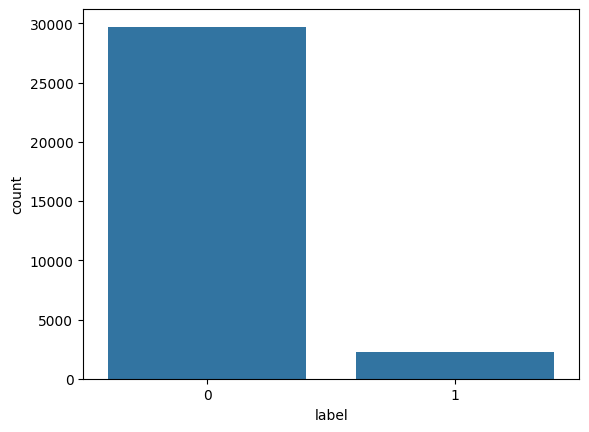

In [7]:
## EDA - CounterPlot
sns.countplot(x=df['label'],data=df)

From the Image I can see the following No Hate is high when compared to Hate
* 0---> No Hate
* 1---> Hate



In [8]:
df.shape

(31962, 3)

In [9]:
## Missing value
df.isnull().sum()

,0
id,0
label,0
tweet,0


In [10]:
df.drop(columns=['id'],axis=1, inplace=True)

In [11]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [12]:
## Let's check the other data aswell
new_dataset=pd.read_csv("raw_data.csv")

In [13]:
new_dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
new_dataset.shape

(24783, 7)

In [16]:
new_dataset.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [17]:
new_dataset.drop(columns=["Unnamed: 0","count","hate_speech","offensive_language","neither"],axis=1,inplace=True)

In [18]:
new_dataset.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<Axes: xlabel='class', ylabel='count'>

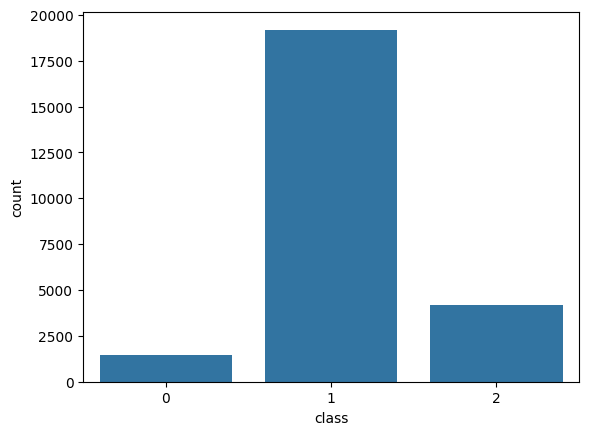

In [15]:
## EDA
sns.countplot(x=new_dataset['class'],data=new_dataset)

As, I am going to merge `new_dataset` with `df` to handle the imbalance dataset I need to preprocess or transform my dataset in such a way it should look like similar once.

**Class Labels**
- 0--> hate
- 1--> abusive
- 2--> no hate

In [19]:
## Let's copy the value of the class 1 into class 0

new_dataset[new_dataset['class']==0]["class"]=1

/tmp/ipython-input-19-3970078362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[new_dataset['class']==0]["class"]=1


In [20]:
# let's check the values in the class 0
new_dataset[new_dataset['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [21]:
## Replace the value of 0 to 1
new_dataset['class'].replace({0:1},inplace=True)

/tmp/ipython-input-21-912997207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset['class'].replace({0:1},inplace=True)


<Axes: xlabel='class', ylabel='count'>

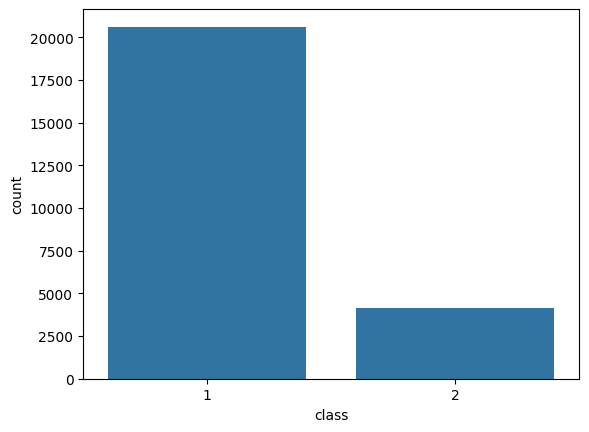

In [22]:
## EDA
sns.countplot(x=new_dataset['class'],data=new_dataset)

In [24]:
## Let's replace the value of 2 to 0

new_dataset['class'].replace({2:0},inplace=True)

<Axes: xlabel='class', ylabel='count'>

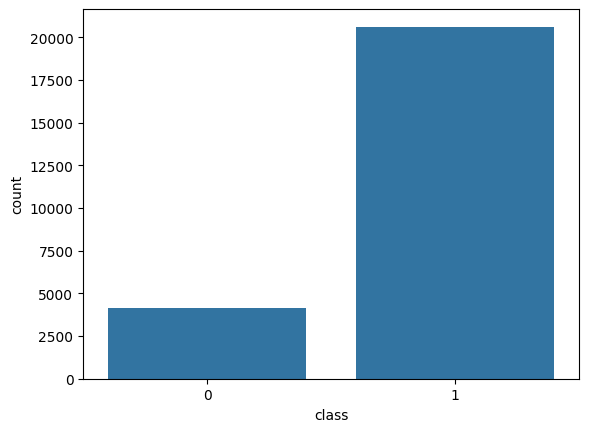

In [25]:
sns.countplot(x=new_dataset['class'],data=new_dataset)

In [26]:
df.head(),new_dataset.head()

(   label                                              tweet
 0      0   @user when a father is dysfunctional and is s...
 1      0  @user @user thanks for #lyft credit i can't us...
 2      0                                bihday your majesty
 3      0  #model   i love u take with u all the time in ...
 4      0             factsguide: society now    #motivation,
    class                                              tweet
 0      0  !!! RT @mayasolovely: As a woman you shouldn't...
 1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
 2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
 3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
 4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...)

In [27]:
##  let's change the name of the class to label
new_dataset.rename(columns={"class":"label"}, inplace=True)

In [30]:
print(df.head())
print("====")
print(new_dataset.head())

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation
====
   label                                              tweet
0      0  !!! RT @mayasolovely: As a woman you shouldn't...
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [32]:
## Merge the dataset
frame=[df,new_dataset]
df = pd.concat(frame)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [33]:
df.shape

(81528, 2)

<Axes: xlabel='label', ylabel='count'>

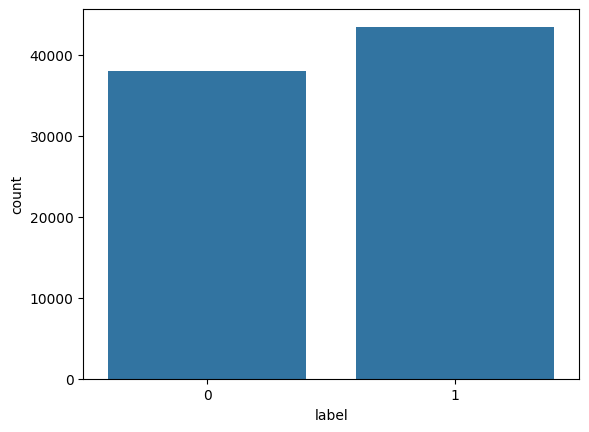

In [34]:
sns.countplot(x=df['label'],data=df)

**Preprocessing**

In [49]:
import nltk
import re
import unicodedata
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [51]:
## Create a function that can clean my data in a single short
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def data_cleaning(text):
    text = str(text).lower()
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

    text = remove_emojis(text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)

    words = [word for word in text.split() if word not in stopword]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

In [52]:
df['tweet'][0]

,tweet
0,user father dysfunct selfish drag kid dysfunct...
0,rt mayasolov woman shouldnt complain clean hou...
0,rt mayasolov woman shouldnt complain clean hou...


Applying the function on entire dataset

In [53]:
df['tweet']=df['tweet'].apply(data_cleaning)

In [54]:
df['tweet'][3]

,tweet
3,model love u take u time ur
3,rt cganderson vivaba look like tranni
3,rt cganderson vivaba look like tranni


In [55]:
x=df['tweet']
y=df['label']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

65222 65222
16306 16306


**Feature engineering**

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
## Integer Encoding of the data
max_words=50000
max_len=300

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences=tokenizer.texts_to_sequences(x_train)
sequences_matriz=pad_sequences(sequences,maxlen=max_len)

- **Tokenizer**, In natural language processing (NLP), a tokenizer is a crucial component that breaks down text into smaller units called tokens. These tokens can be words, sub-words, or even characters, depending on the specific task and the chosen tokenization strategy. Tokenization is a fundamental step in most NLP pipelines, as it allows machines to understand and process text data effectively
- **padding**, In Natural Language Processing (NLP), padding is the process of adding extra elements (often zeros or special tokens) to sequences (like sentences or text segments) to make them all the same length. This is necessary because many machine learning models, especially those based on neural networks, require input data to have a consistent shape and size



In [63]:
sequences_matriz

array([[    0,     0,     0, ...,   185,  3934,  4433],
       [    0,     0,     0, ...,   173,   332,   121],
       [    0,     0,     0, ...,  2237,    29,   378],
       ...,
       [    0,     0,     0, ...,    10,     5,  6808],
       [    0,     0,     0, ...,   120,    98, 47260],
       [    0,     0,     0, ...,  1037, 47262,   876]], dtype=int32)

In [71]:
## Model Architecture
from keras.models import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.layers import Input

In [72]:
model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(max_words, 100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 300, 100)       │     5,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_4             │ (None, 300, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,080,501 (19.38 MB)

 Trainable params: 5,080,501 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [74]:
## Training the model
history=model.fit(sequences_matriz,y_train,batch_size=128,epochs=3,validation_split=0.2)

Epoch 1/3
408/408 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.8321 - loss: 0.3467 - val_accuracy: 0.9450 - val_loss: 0.1605
Epoch 2/3
408/408 ━━━━━━━━━━━━━━━━━━━━ 432s 988ms/step - accuracy: 0.9503 - loss: 0.1398 - val_accuracy: 0.9503 - val_loss: 0.1471
Epoch 3/3
408/408 ━━━━━━━━━━━━━━━━━━━━ 441s 986ms/step - accuracy: 0.9563 - loss: 0.1275 - val_accuracy: 0.9521 - val_loss: 0.1466


In [75]:
test_sequences=tokenizer.texts_to_sequences(x_test)
test_sequences_matrix=pad_sequences(test_sequences,maxlen=max_len)

In [76]:
test_sequences_matrix

array([[    0,     0,     0, ...,   295,   276,     1],
       [    0,     0,     0, ...,   849, 11839,    84],
       [    0,     0,     0, ...,   285,    44,     4],
       ...,
       [    0,     0,     0, ...,     0,   116,     1],
       [    0,     0,     0, ...,   242,  3347, 37969],
       [    0,     0,     0, ...,    53,   122,   338]], dtype=int32)

In [78]:
## Model Evaluation
accr=model.evaluate(test_sequences_matrix,y_test)

510/510 ━━━━━━━━━━━━━━━━━━━━ 89s 175ms/step - accuracy: 0.9497 - loss: 0.1487


In [80]:
lstm_prediction=model.predict(test_sequences_matrix)

510/510 ━━━━━━━━━━━━━━━━━━━━ 97s 189ms/step


In [81]:
## confusion metrix
res=[]
for prediction in lstm_prediction:
  if prediction[0] < 0.5:
    res.append(0)
  else:
    res.append(1)


In [82]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,res))

[[7334  249]
 [ 569 8154]]


In [84]:
## Dump the model and tokenizer
import pickle
with open("tokenizer.pickle",'wb') as handle:
  pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

model.save("model.h5")


In [85]:
import keras

In [86]:
load_model=keras.models.load_model('model.h5')
with open('tokenizer.pickle','rb') as handle:
  load_tokenizer=pickle.load(handle)

In [87]:
## Prediction
test="i love this movie"

## Create a function that can clean my data in a single short
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def data_cleaning(text):
    text = str(text).lower()
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

    text = remove_emojis(text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)

    words = [word for word in text.split() if word not in stopword]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

test=[data_cleaning(test)]
print(test)

seq=load_tokenizer.texts_to_sequences(test)
padded=pad_sequences(seq,maxlen=300)
print(seq)

pred=load_model.predict(padded)

print("pred",pred)
if pred<0.5:
  print("no hate")
else:
  print("Hate and abusive")

['love movi']
[[9, 385]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
pred [[0.02445411]]
no hate
